This week, we will briefly talk about [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation), which is a useful way to estimate the probability density function of a random variable. The idea is quite simple, let's start by showing you example of density estimation using a gaussian kernel for 1D case. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

### Generate a random 1D dataset

We first generate a bi-modal distribution using two gaussians. 

Text(0,0.5,'Frequencies')

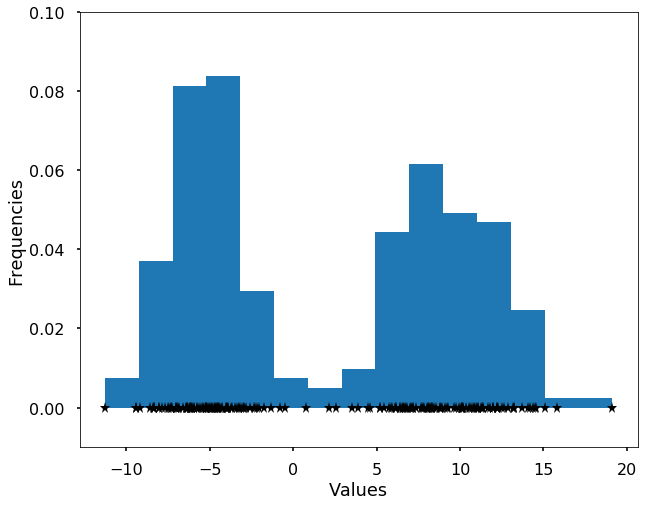

In [147]:
np.random.seed(12)
X = np.concatenate((np.random.normal(loc = -5, scale= 2, size = 100), np.random.normal(loc = 10, scale= 3, size = 100)))
# let's shuffle the order of the data (this is most for the animation later)
np.random.shuffle(X)

plt.figure(figsize = (10,8))
plt.hist(X, bins = 15, normed=True)
plt.plot(X, np.zeros(len(X)), '*k')
plt.ylim((-0.01, 0.1))
plt.xlabel('Values')
plt.ylabel('Frequencies')

### Define gaussian kernels

We define the gaussian kernels as the following function, and we generate a grid and plot a example of gaussian kernel centered at 5. 

Text(0.5,1,'Example of a kernel centered at 5')

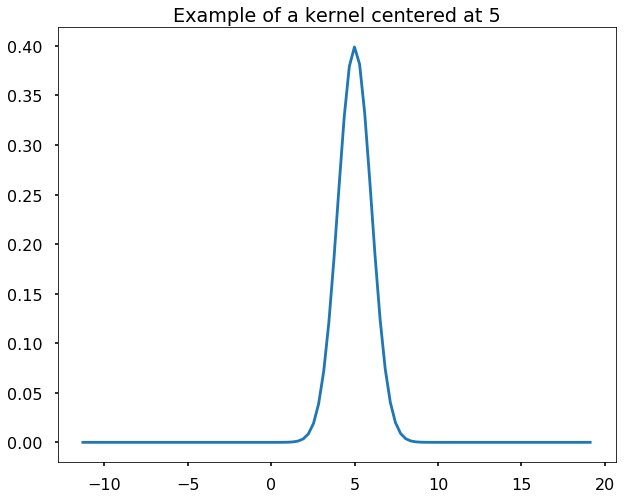

In [150]:
def gaussian_kernel(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

# generate grid
min_v = np.min(X)
max_v = np.max(X)
grid = np.linspace(min_v, max_v, 100)

# plot out the example
plt.figure(figsize = (10,8))
plt.plot(grid, gaussian_kernel(grid, mu = 5, sigma = 1.0))
plt.title('Example of a kernel centered at 5')

### Estimate the density using the kernels

The kernel density estimation is actually very simple, you can think that for each data point, we will center a gaussian kernel at it, and then we just sum all the kernels, we will have the kernel density estimation. The following is an animation that shows this process, we add one kernel at a time. Note that, the width of the kernel has an effect of the smoothness of the density estimation, see the following example. 

In [153]:
density_estimation = np.zeros(len(grid))

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Kernel density estimation', artist='Qingkai Kong',
                comment='This is for gaussian kernels')
writer = FFMpegWriter(fps=10, metadata=metadata)
fig = plt.figure(figsize = (10,8))

line1, = plt.plot(grid, density_estimation, 'r-', label = 'Sum of all kernels')
plt.ylim(-0.01, 0.1)
plt.legend()
plt.xlabel('Values')
plt.ylabel('Density')

with writer.saving(fig, "Kernel_density_estimation.mp4", 100):

    for x in X:
        plt.plot(x, 0, '*k')

        kernel = gaussian_kernel(grid, mu = x, sigma = 1.0)
        density_estimation += kernel / len(X)
        plt.plot(grid, kernel / 8, 'k', alpha = 0.1)
        line1.set_data(grid, density_estimation)
        
        writer.grab_frame()
        
plt.close()

## Kernel density estimation using Scipy

The above code is just to show you the basic idea of the kernel density estimation. In reality, we don't need to write the code by ourselves, we could use the existing packages, either scipy or sklearn. Here we show the example using scipy. We could see that the derived density estimation is very similar to what we got above. 

In [154]:
from scipy import stats

Text(0,0.5,'Density')

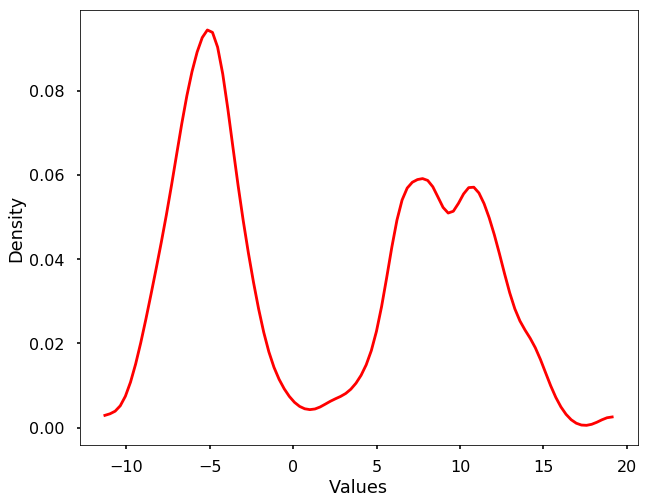

In [155]:
kernel = stats.gaussian_kde(X, 0.1)
plt.figure(figsize = (10,8))
plt.plot(grid,kernel.evaluate(grid), 'r-')
plt.xlabel('Values')
plt.ylabel('Density')

### 2D density estimation

Besides, we could expand this density estimation into 2 dimensions. Let's see the example using scipy. 